In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import sys
sys.path.append("../../../../../src/")
import nanonets_utils
import nanonets
from scipy.optimize import curve_fit
plt.style.use(["science","bright","grid"])

def exp_func(x, a, b, c):
    return -a*np.exp(-b*x) + c
def exp_func2(x, a, b, c, d):
    return a*np.exp(b*(x-c)) + d

def saturation_cuve(t, tau, a0, t0):
    return a0*(1 - np.exp(-(t-t0) / tau))

def stretched_saturation_curve(t, tau, a0, beta):
    return a0*(1 - np.exp(-((t)/tau)**beta))

def double_saturation_cuve(t, tau1, tau2, a0, b0, b1):
    return a0 - b0* np.exp(-t / tau1) - b1* np.exp(-t / tau2)

def lin_func(x, a, b, c):
    return a*(x-b)+c

## String

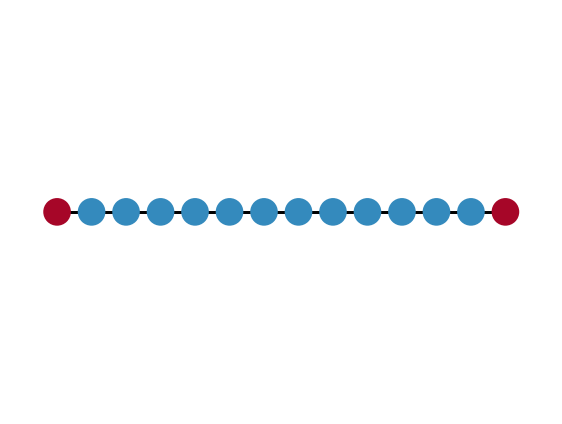

In [144]:
topology_parameter  = {
    "Nx"                : 11,
    "Ny"                : 1,
    "Nz"                : 1,
    "e_pos"             : [[0,0,0],[10,0,0]],
    "electrode_type"    : ['constant','floating']
}
sim_class   = nanonets.simulation(topology_parameter)
fig, ax     = plt.subplots(dpi=200)
fig, ax     = nanonets_utils.display_network(sim_class, fig=fig, ax=ax, node_size=80)
fig.savefig("../plots/string_network.svg", transparent=True, bbox_inches='tight')
fig.savefig("../plots/string_network.pdf", transparent=False, bbox_inches='tight')

In [145]:
folder  = "/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/"
t_vals  = np.arange(4999)*1e-7*1e6
N_vals  = np.arange(2,13)

data_string     = {N_p : pd.read_csv(f"{folder}Nx={N_p}_Ny=1_Nz=1_Ne=2.csv") for N_p in N_vals}
states_string   = pd.read_csv(f"{folder}mean_state_Nx=12_Ny=1_Nz=1_Ne=2.csv")

In [146]:
taus    = []
params  = []
covs    = []
starts  = len(N_vals)*[0]
stops   = len(N_vals)*[1000]

for i, N in enumerate(N_vals):
    x_fit   = t_vals[starts[i]:stops[i]]
    y_fit   = data_string[N]['Current'].values[starts[i]:stops[i]]*1000
    # p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,80,90], bounds=((1,70,-np.inf),(50,110,np.inf)))
    # p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,80,0], bounds=[(0,70,0),(50,120,10)])
    p, cov  = curve_fit(stretched_saturation_curve, x_fit, y_fit, p0=[10,80,0.9], bounds=[(0,70,0),(50,120,2)])
    taus.append(p[0])
    params.append(p)
    covs.append(np.sqrt(cov[0,0]))
    
params

[array([  1.49761992, 103.26927297,   0.71675137]),
 array([ 3.07912597, 98.82796832,  0.4446677 ]),
 array([  5.73824192, 103.16478884,   0.76686351]),
 array([ 5.21230193, 81.61764849,  1.27396432]),
 array([ 13.88097267, 101.51778712,   0.70271902]),
 array([10.97547244, 80.98481645,  1.30621307]),
 array([14.95209777, 80.70424584,  1.31694748]),
 array([18.64115495, 78.42862815,  1.4141548 ]),
 array([23.42223461, 76.39897741,  1.49080709]),
 array([28.80345984, 75.07913166,  1.52248448]),
 array([36.01833367, 75.14638132,  1.513369  ])]

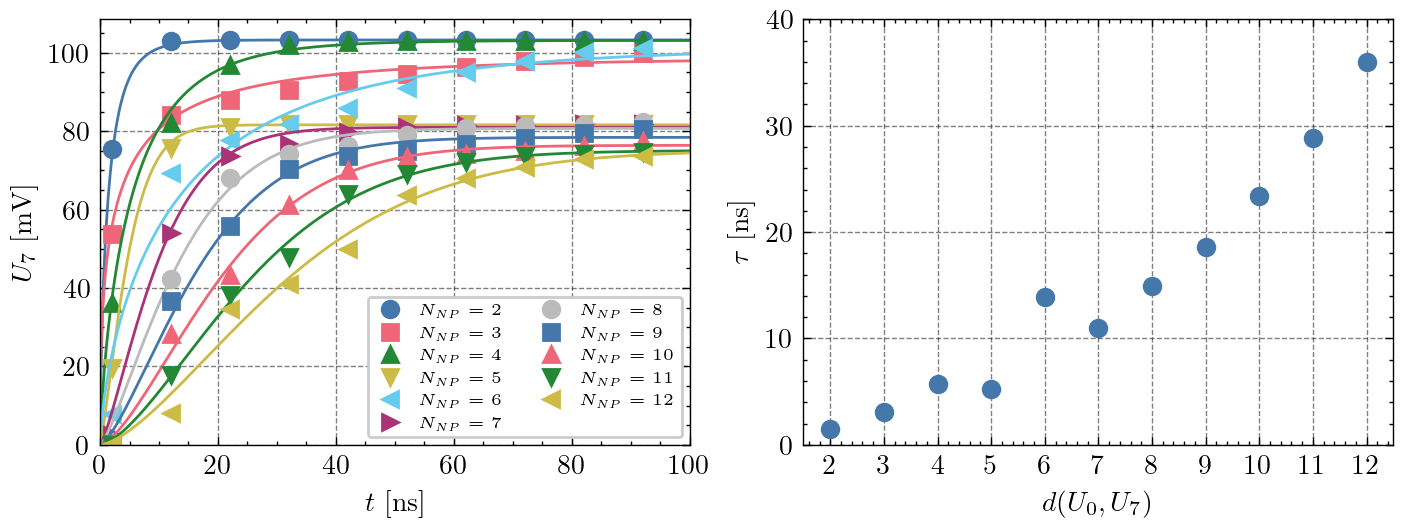

In [147]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot(1,2,1)
ms  = ['o','s','^','v','<','>']

for i, N in enumerate(N_vals):

    y_val   = data_string[N]['Current'].values*1000
    y_val_e = data_string[N]['Error'].values*1000
    pp      = ax.plot(t_vals, y_val, label='$N_{NP} = '+f'{N}$', marker=ms[i%len(ms)], markevery=(20,100), ls='')
    ax.plot(t_vals, stretched_saturation_curve(t_vals,*params[i]), c=pp[0].get_color())
    # ax.fill_between(t_vals, y_val-y_val_e, y_val+y_val_e, color='black', alpha=0.2)

ax.set_ylabel("$U_7$ [mV]")
ax.set_xlabel("$t$ [ns]")
ax.legend(frameon=True, loc='lower right', fontsize='xx-small', ncol=2)
ax.set_xlim(0,100)
ax.set_ylim(0)

ax  = fig.add_subplot(1,2,2)
ax.plot(np.array(N_vals), taus, 'o')
ax.set_ylabel("$\\tau$ [ns]")
ax.set_xlabel("$d(U_0,U_7)$")
ax.set_xticks(N_vals)
ax.set_ylim(0,40)

fig.savefig("../plots/string_time_scale_vs_system_size.svg", transparent=True)
fig.savefig("../plots/string_time_scale_vs_system_size.pdf", transparent=False)

## String @ 10K

In [155]:
T_fold  = "highT"
folder  = f"/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/{T_fold}/"
# folder  = f"/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/{T_fold}/"
t_vals  = np.arange(4999)*1e-7*1e6
N_vals  = np.arange(2,13)

data_string_T   = {N_p : pd.read_csv(f"{folder}Nx={N_p}_Ny=1_Nz=1_Ne=2.csv") for N_p in N_vals}
states_string_T = pd.read_csv(f"{folder}mean_state_Nx=12_Ny=1_Nz=1_Ne=2.csv")

In [156]:
taus    = []
params  = []
covs    = []
starts  = len(N_vals)*[0]
stops   = len(N_vals)*[3000]

for i, N in enumerate(N_vals):
    x_fit   = t_vals[starts[i]:stops[i]]
    y_fit   = data_string_T[N]['Current'].values[starts[i]:stops[i]]*1000
    # p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,80,90], bounds=((1,70,-np.inf),(50,110,np.inf)))
    # p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,80,0], bounds=[(0,70,0),(60,120,10)])
    p, cov  = curve_fit(stretched_saturation_curve, x_fit, y_fit, p0=[10,80,1], bounds=[(0,70,0),(60,120,2)])
    taus.append(p[0])
    params.append(p)
    covs.append(np.sqrt(cov[0,0]))
    
params

[array([  1.61771909, 107.86981718,   0.62860398]),
 array([  3.46404955, 107.30044703,   0.70299827]),
 array([  5.93260393, 107.57468935,   0.78946275]),
 array([  9.36401274, 107.53009347,   0.80625516]),
 array([ 13.32321417, 107.35096186,   0.85162855]),
 array([ 18.63871955, 107.4130988 ,   0.86430674]),
 array([ 24.39169454, 107.31190436,   0.89965466]),
 array([ 31.40099873, 107.36005022,   0.91236126]),
 array([ 40.21901797, 107.29647789,   0.93655827]),
 array([ 49.16524826, 107.25949315,   0.94868714]),
 array([ 59.63896075, 107.18188648,   0.97038213])]

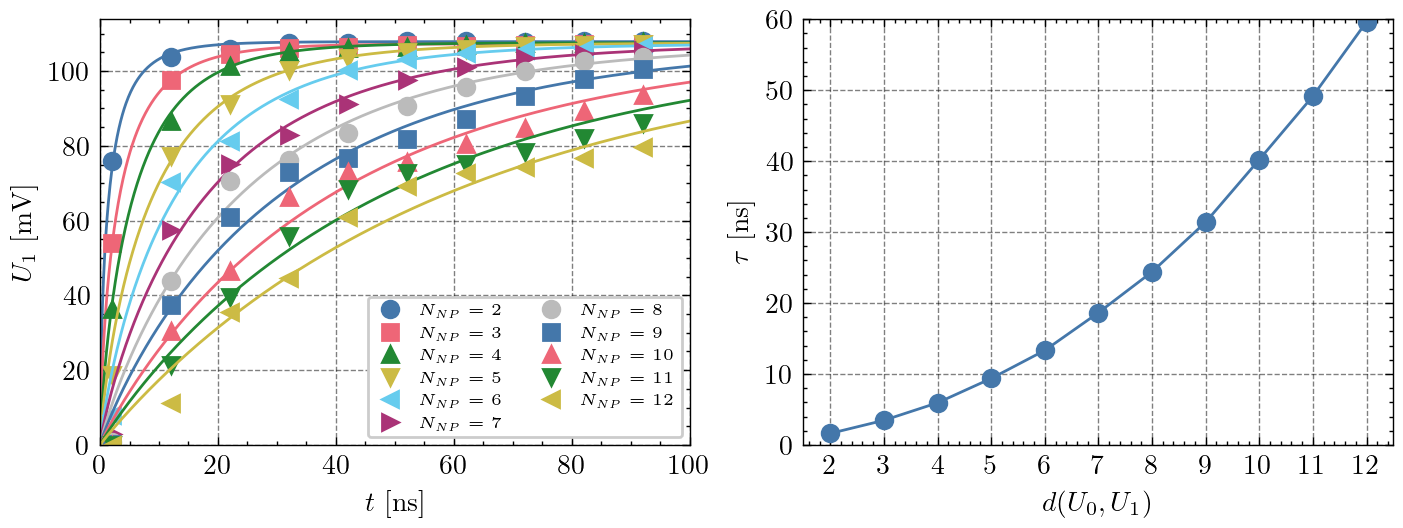

In [158]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot(1,2,1)
ms  = ['o','s','^','v','<','>']

for i, N in enumerate(N_vals):

    y_val   = data_string_T[N]['Current'].values*1000
    y_val_e = data_string_T[N]['Error'].values*1000
    pp      = ax.plot(t_vals, y_val, label='$N_{NP} = '+f'{N}$', marker=ms[i%len(ms)], markevery=(20,100), ls='')
    ax.plot(t_vals, stretched_saturation_curve(t_vals,*params[i]), c=pp[0].get_color())
    # ax.fill_between(t_vals, y_val-y_val_e, y_val+y_val_e, color='black', alpha=0.2)

ax.set_ylabel("$U_1$ [mV]")
ax.set_xlabel("$t$ [ns]")
ax.legend(frameon=True, loc='lower right', fontsize='xx-small', ncol=2)
ax.set_xlim(0,100)
ax.set_ylim(0)

ax  = fig.add_subplot(1,2,2)
ax.plot(np.array(N_vals), taus, '-o')
ax.set_ylabel("$\\tau$ [ns]")
ax.set_xlabel("$d(U_0,U_1)$")
ax.set_xticks(N_vals)
ax.set_ylim(0,60)

fig.savefig(f"../plots/string_at_{T_fold}_time_scale_vs_system_size.svg", transparent=True)
fig.savefig(f"../plots/string_at_{T_fold}_time_scale_vs_system_size.pdf", transparent=False)

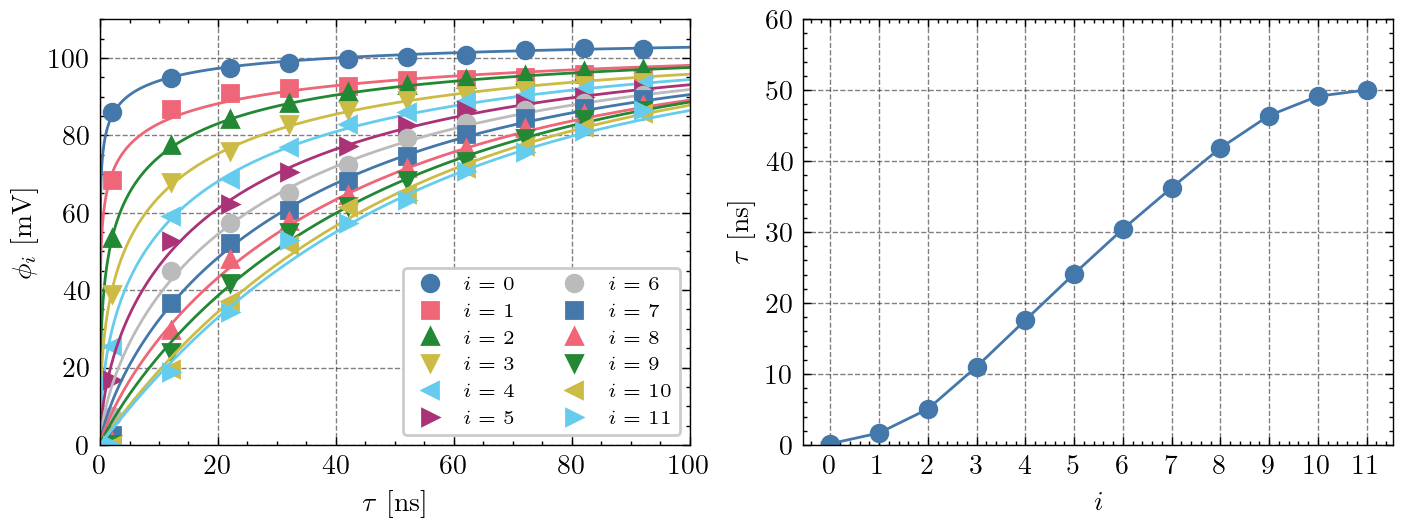

In [159]:
ms  = ['o','s','^','v','<','>']
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

tau_network = []
for i in range(12):

    y   = states_string_T[f"{i}"].values*1000
    # p,_ = curve_fit(saturation_cuve, t_vals, y, p0=[30, 90, 0], bounds=[(0,70,0),(100,120,50)])
    # p,_ = curve_fit(saturation_cuve, t_vals[:5000], y[:5000], p0=[30, 90, 0], bounds=[(0,70,0),(60,120,10)])
    p,_ = curve_fit(stretched_saturation_curve, t_vals[:5000], y[:5000], p0=[30, 90, 1], bounds=[(0,70,0),(60,120,1)])
    tau_network.append(p[0])

    pp  = ax1.plot(t_vals, y, marker=ms[i%len(ms)], label=f'$i = {i}$', markevery=(20,100), ls='')
    ax1.plot(t_vals, stretched_saturation_curve(t_vals, *p), c=pp[0].get_color())

ax1.set_xlim(0,100)
ax1.set_ylim(0,110)
ax1.set_xlabel("$\\tau$ [ns]")
ax1.set_ylabel("$\phi_i$ [mV]")
ax1.legend(ncol=2, fontsize='x-small')

ax2.plot(np.arange(12), tau_network, '-o')
ax2.set_xticks(np.arange(12))
ax2.set_ylabel("$\\tau$ [ns]")
ax2.set_xlabel("$i$")
ax2.set_ylim(0,60)

fig.savefig(f"../plots/string_states_at_{T_fold}_time_scale_vs_system_size.svg", transparent=True)
fig.savefig(f"../plots/string_states_at_{T_fold}_time_scale_vs_system_size.pdf", transparent=False)

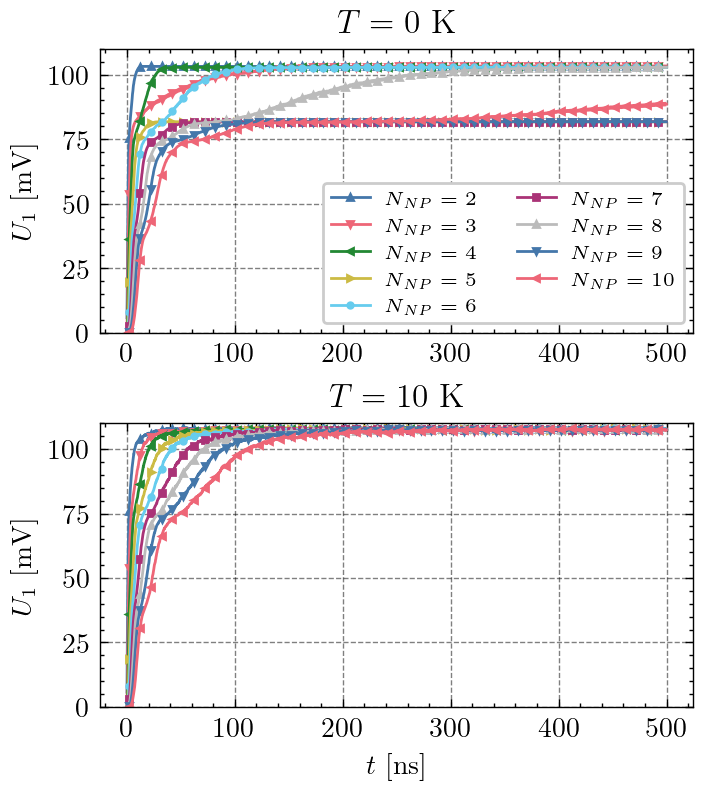

In [191]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figheight(fig.get_figheight()*1.5)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

for i in range(2,11):

    y   = data_string[i]['Current']*1000
    y_e = data_string[i]['Error']*1000

    ax1.plot(t_vals, y, label='$N_{NP} = '+f'{i}$', marker=ms[i%len(ms)], markevery=(20,100), ms=2)
    ax1.fill_between(t_vals, y-y_e, y+y_e)
    ax1.set_ylabel("$U_1$ [mV]")
    ax1.set_ylim(0,110)
    ax1.legend(ncol=2, fontsize='x-small')
    ax1.set_title('$T = 0$ K')

    y   = data_string_T[i]['Current']*1000
    y_e = data_string_T[i]['Error']*1000
    
    ax2.plot(t_vals, y, label='$N_{NP} = '+f'{N}$', marker=ms[i%len(ms)], markevery=(20,100), ms=2)
    ax2.fill_between(t_vals, y-y_e, y+y_e)
    ax2.set_ylabel("$U_1$ [mV]")
    ax2.set_xlabel("$t$ [ns]")
    ax2.set_ylim(0,110)
    ax2.set_title('$T = 10$ K')

fig.savefig(f"../plots/output_temperature_comparsion.svg", transparent=True)
fig.savefig(f"../plots/output_temperature_comparsion.pdf", transparent=False)

0.5356554612465038


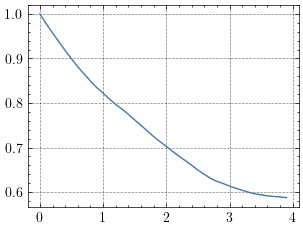

In [161]:
start   = 3000
f_end   = 40
state   = data_string_T[11]['Current'].values
y       = state[start:]*1000
ac      = nanonets_utils.autocorrelation(y, y, 1500)
t       = t_vals[:len(ac)]
p, _    = curve_fit(exp_func, t[:f_end], ac[:f_end])
plt.plot(t[:f_end], ac[:f_end])
print(np.abs(p[0]))

## Network

In [1]:
path    = "/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/"
N_vals  = [3,5,7,9,11,13]
data    = {N : pd.read_csv(f"{path}Nx={N}_Ny={N}_Nz=1_Ne=8.csv") for N in N_vals}
states  = pd.read_csv(f"{path}mean_state_Nx=11_Ny=11_Nz=1_Ne=8.csv")
x_val   = data[5]['E0'].values*1000
t_val   = np.arange(len(x_val))*1e-10*1e9

NameError: name 'pd' is not defined

In [195]:
taus    = []
params  = []
covs    = []
starts  = len(N_vals)*[0]
stops   = len(N_vals)*[5000]

for i, N in enumerate(N_vals):
    x_fit   = t_vals[starts[i]:stops[i]]
    y_fit   = data[N]['Current'].values[starts[i]:stops[i]]*1000
    p, cov  = curve_fit(stretched_saturation_curve, x_fit, y_fit, p0=[10,20,0], bounds=((0,0,0),(200,30,2)))
    taus.append(p[0])
    params.append(p)
    covs.append(np.sqrt(cov[0,0]))
    
params

[array([ 1.81094987, 10.22819503,  0.80748377]),
 array([3.63031915, 8.29002692, 1.15052751]),
 array([10.64988641,  9.33251991,  1.09799198]),
 array([29.63764537, 13.22357227,  1.17027035]),
 array([68.81264448, 25.9804675 ,  1.82999042]),
 array([128.50547546,  27.69472734,   1.53167537])]

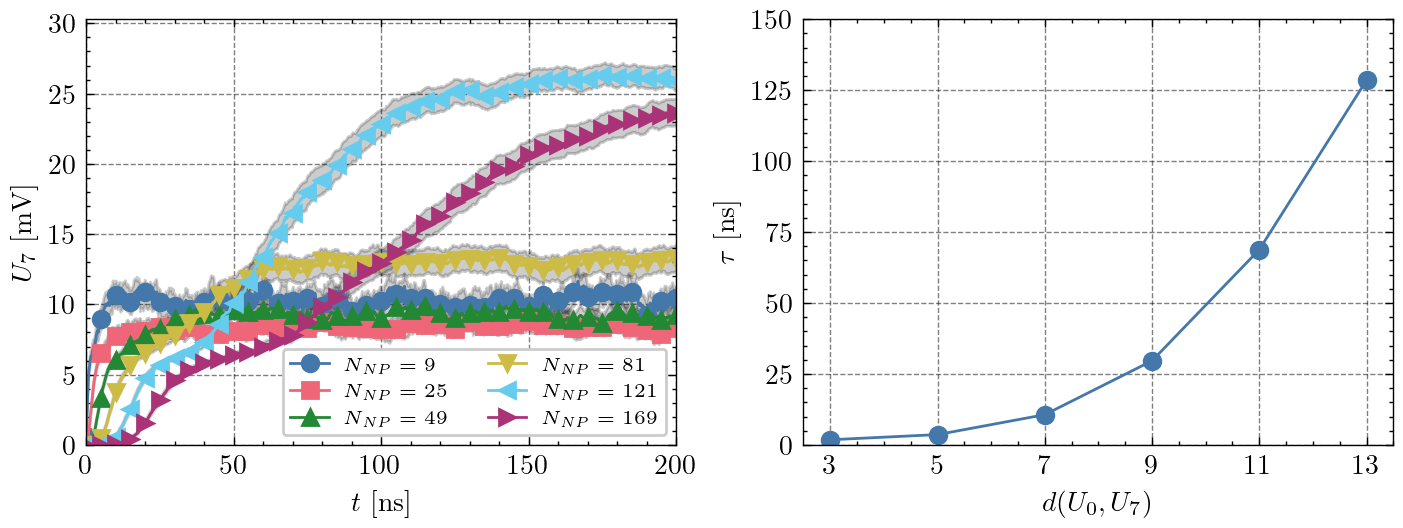

In [200]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot(1,2,1)
ms  = ['o','s','^','v','<','>']

for i, N in enumerate(N_vals):

    y_val   = data[N]['Current'].values*1000
    y_val_e = data[N]['Error'].values*1000
    ax.plot(t_vals, y_val, label='$N_{NP} = '+f'{N**2}$', marker=ms[i%len(ms)], markevery=(50))
    ax.fill_between(t_vals, y_val-y_val_e, y_val+y_val_e, color='black', alpha=0.2)

ax.set_ylabel("$U_7$ [mV]")
ax.set_xlabel("$t$ [ns]")
ax.legend(frameon=True, loc='lower right', fontsize='x-small', ncol=2)
ax.set_xlim(0,200)
ax.set_ylim(0)

ax  = fig.add_subplot(1,2,2)
ax.plot(np.array(N_vals), taus, '-o')
ax.set_ylabel("$\\tau$ [ns]")
ax.set_xlabel("$d(U_0,U_7)$")
ax.set_xticks(N_vals)
ax.set_ylim(0,150)

fig.savefig("../plots/network_time_scale_vs_system_size.svg", transparent=True)
fig.savefig("../plots/network_time_scale_vs_system_size.pdf", transparent=False)

In [214]:
[i*11+11//2 for i in range(11)] + [121]

[5, 16, 27, 38, 49, 60, 71, 82, 93, 104, 115, 121]

In [213]:
11*11

121

In [218]:
states_string

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.045312,0.015904,0.004412,0.001203,0.000328,0.000089,0.000024,0.000007,0.000002,4.936670e-07,1.347624e-07,3.742445e-08,1.272531e-08
1,0.057602,0.026976,0.008983,0.002496,0.000680,0.000185,0.000051,0.000014,0.000004,1.024357e-06,2.796315e-07,7.765559e-08,2.640497e-08
2,0.065364,0.034964,0.014120,0.004286,0.001168,0.000318,0.000087,0.000024,0.000006,1.758922e-06,4.801547e-07,1.333423e-07,4.533993e-08
3,0.070252,0.040504,0.019233,0.006894,0.001949,0.000531,0.000145,0.000039,0.000011,2.934340e-06,8.010234e-07,2.224497e-07,7.563884e-08
4,0.072698,0.045456,0.023894,0.009730,0.002951,0.000805,0.000219,0.000060,0.000016,4.443235e-06,1.212925e-06,3.368377e-07,1.145338e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.102055,0.087345,0.098696,0.086763,0.097898,0.086491,0.093324,0.086367,0.083075,9.727145e-02,8.570426e-02,9.701321e-02,8.177111e-02
4995,0.102055,0.087345,0.098696,0.086763,0.097898,0.086491,0.093324,0.086367,0.083075,9.727145e-02,8.570426e-02,9.701321e-02,8.177111e-02
4996,0.102055,0.087343,0.098688,0.086732,0.097928,0.086499,0.093326,0.086367,0.083076,9.727150e-02,8.570427e-02,9.701322e-02,8.177111e-02
4997,0.102055,0.087343,0.098688,0.086732,0.097928,0.086499,0.093326,0.086367,0.083076,9.727150e-02,8.570427e-02,9.701322e-02,8.177111e-02


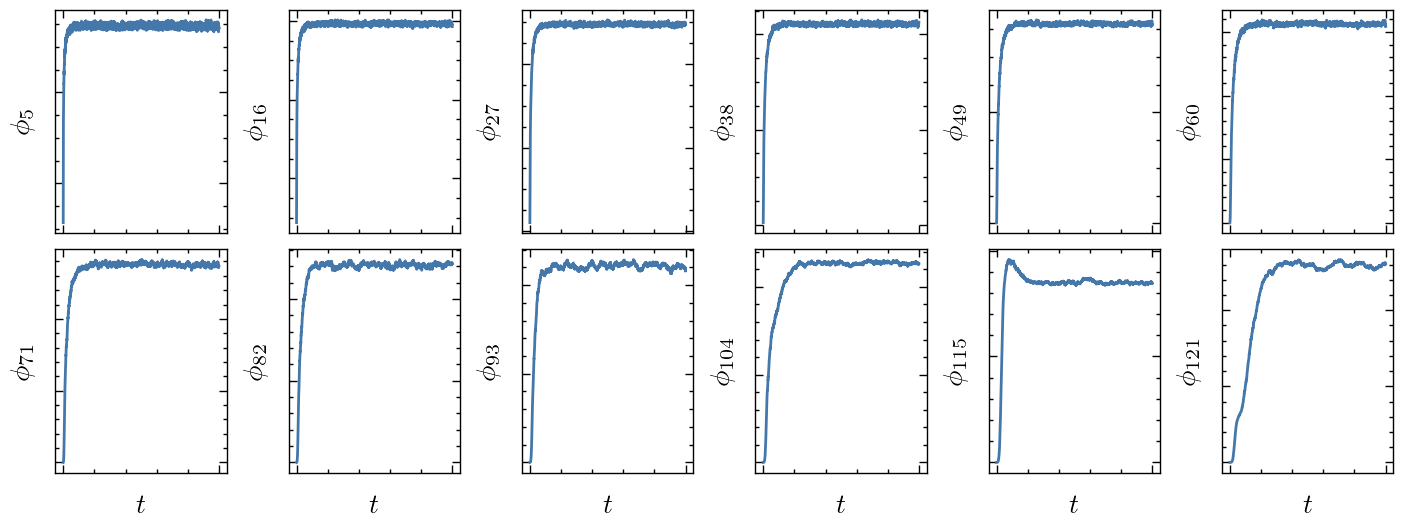

In [235]:
i_np    = [i*11+11//2 for i in range(11)] + [121]
fig     = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)

for j, i in enumerate(i_np):

    ax  = fig.add_subplot(2,6,j+1)
    y   = states[f"{i}"].values*1000

    ax.plot(t_vals, y)
    ax.set_ylabel("$\phi_{"f'{i}'+"}$")
    ax.set_yticklabels("")
    ax.set_xticklabels("")
    ax.grid(False)

    if j > 5:
        ax.set_xlabel("$t$")
    
fig.savefig("../plots/network_states.svg", transparent=True)
fig.savefig("../plots/network_states.pdf", transparent=False)

---